# Space Server Dataset

The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

* objid = Object Identifier
* ra = J2000 Right Ascension (r-band)-
* dec = J2000 Declination (r-band)
* u (ultraviolet)= better of DeV/Exp magnitude fit
* g (green) = better of DeV/Exp magnitude fit
* r (red) = better of DeV/Exp magnitude fit
* i (Near infrared) = better of DeV/Exp magnitude fit
* z (Infrared) = better of DeV/Exp magnitude fit
* run = Run Number
* rereun = Rerun Number
* camcol = Camera column
* field = Field number
* specobjid = Object Identifier
* class = object class (galaxy, star or quasar object)
* redshift = Final Redshift
* plate = plate number
* mjd = MJD of observation
* fiberid = fiber ID

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import statsmodels.api as sm

In [46]:
df=pd.read_csv('skyserver.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [47]:
df.shape

(10000, 18)

In [48]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [49]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [50]:
df.nunique()

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

In [51]:
df.drop(['objid','specobjid','rerun'],axis=1,inplace=True)#Since it is not required

In [52]:
df['class'].value_counts()
#Most of the class belongs to galaxy and star,qso is very less

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [53]:
#Sice we are looking only stars and galaxy,Hence removing QSO
df = df[df["class"] != "QSO"]

In [54]:
df.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
count,9150.000000,9150.000000,9150.000000,9150.000000,9150.000000,9150.000000,9150.000000,9150.000000,9150.000000,9150.000000,9150.000000,9150.000000,9150.000000,9150.000000
mean,175.349953,14.303436,18.589297,17.250536,16.686981,16.418556,16.250796,975.917596,3.644481,302.138251,0.043896,1477.306448,52966.687104,350.422842
std,47.844894,24.879069,0.842478,0.876612,0.961771,1.027774,1.085480,272.211353,1.665374,162.636560,0.052491,1764.647895,1503.083498,205.659557
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.584047,-0.541007,18.124177,16.737642,16.103342,15.790297,15.551232,752.000000,2.000000,185.000000,0.000050,302.000000,51900.000000,183.000000
50%,180.326741,0.384792,18.822605,17.415660,16.757515,16.448885,16.263595,756.000000,4.000000,299.000000,0.030734,443.000000,51999.000000,347.000000
75%,201.069175,14.646150,19.246003,17.893400,17.369435,17.097865,16.959817,1331.000000,5.000000,413.000000,0.080849,2559.000000,54468.000000,508.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,0.855881,8410.000000,57481.000000,1000.000000


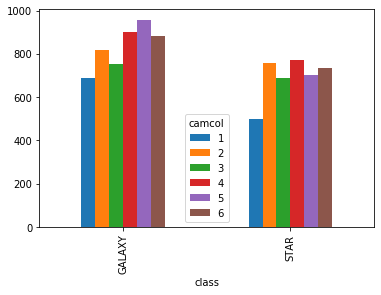

In [55]:
pd.crosstab(df['class'],df['camcol']).plot(kind='bar')

In [56]:
pd.crosstab(df['class'],df['camcol'])

camcol,1,2,3,4,5,6
class,,,,,,
GALAXY,687,818,752,901,957,883
STAR,497,758,690,772,700,735


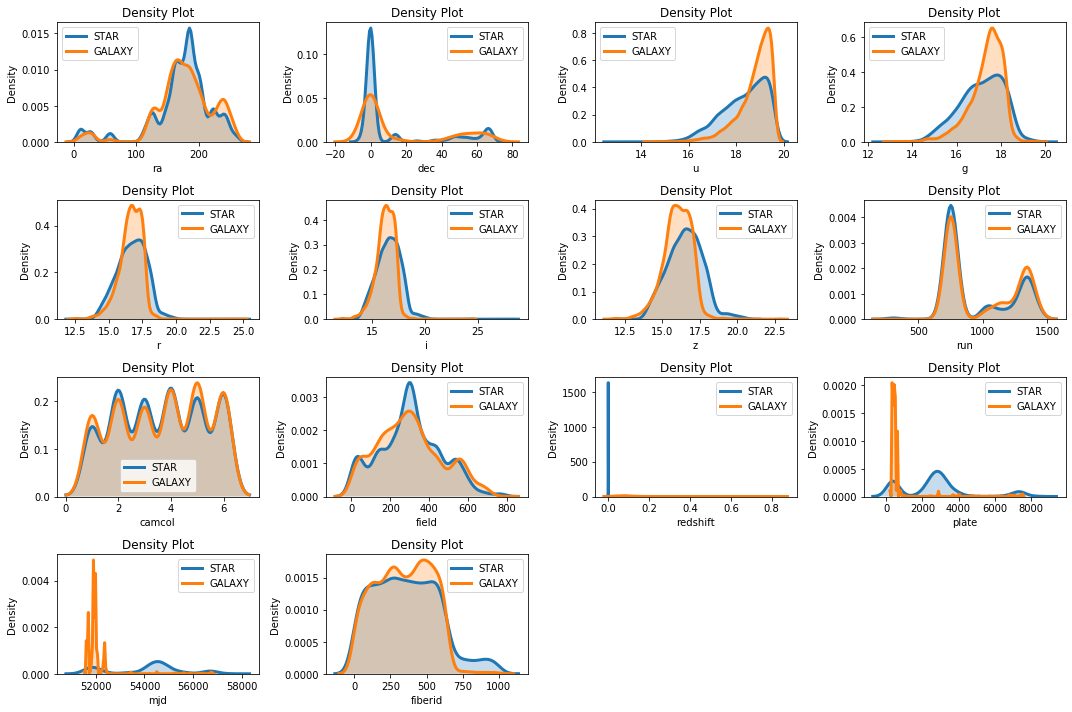

In [57]:
featuredf = df.drop(['class'], axis=1)
featurecols = list(featuredf)
astrObjs = df['class'].unique()
plt.figure(figsize=(15,10))
for i in range(len(featurecols)):
    plt.subplot(4, 4, i+1)
    for j in range(len(astrObjs)):
        sns.distplot(df[df['class']==astrObjs[j]][featurecols[i]], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = astrObjs[j])
    plt.legend()
    plt.title('Density Plot')
    plt.xlabel(featurecols[i])
    plt.ylabel('Density')
plt.tight_layout()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9150 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        9150 non-null   float64
 1   dec       9150 non-null   float64
 2   u         9150 non-null   float64
 3   g         9150 non-null   float64
 4   r         9150 non-null   float64
 5   i         9150 non-null   float64
 6   z         9150 non-null   float64
 7   run       9150 non-null   int64  
 8   camcol    9150 non-null   int64  
 9   field     9150 non-null   int64  
 10  class     9150 non-null   object 
 11  redshift  9150 non-null   float64
 12  plate     9150 non-null   int64  
 13  mjd       9150 non-null   int64  
 14  fiberid   9150 non-null   int64  
dtypes: float64(8), int64(6), object(1)
memory usage: 1.1+ MB


In [59]:
df.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
camcol      0
field       0
class       0
redshift    0
plate       0
mjd         0
fiberid     0
dtype: int64

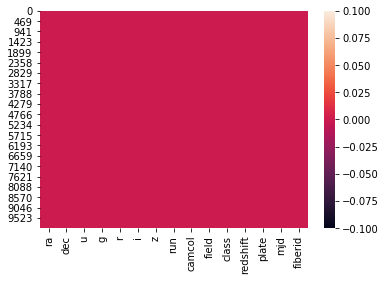

In [60]:
sns.heatmap(df.isnull())

In [61]:
df.corr()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
ra,1.000000,-0.003343,0.031369,0.044955,0.048219,0.046644,0.042717,-0.097634,-0.007712,0.594829,0.058177,-0.104147,-0.094020,0.053506
dec,-0.003343,1.000000,0.025334,0.031638,0.029128,0.022706,0.020952,0.774460,0.113001,-0.139802,0.064539,0.063198,0.048931,0.144510
u,0.031369,0.025334,1.000000,0.886863,0.724185,0.620197,0.560073,0.034092,0.008564,0.005286,0.370752,-0.134479,-0.173348,0.006920
g,0.044955,0.031638,0.886863,1.000000,0.949607,0.885419,0.850721,0.035336,0.006748,0.013053,0.261654,-0.046145,-0.080164,0.036094
r,0.048219,0.029128,0.724185,0.949607,1.000000,0.970975,0.960996,0.029615,0.006739,0.016318,0.097900,0.042550,0.018459,0.050022
i,0.046644,0.022706,0.620197,0.885419,0.970975,1.000000,0.976382,0.020322,0.010256,0.019975,-0.006564,0.106686,0.090696,0.060432
z,0.042717,0.020952,0.560073,0.850721,0.960996,0.976382,1.000000,0.018667,0.006805,0.017672,-0.075021,0.155222,0.144952,0.058567
run,-0.097634,0.774460,0.034092,0.035336,0.029615,0.020322,0.018667,1.000000,0.146138,-0.470945,0.081281,0.079253,0.060059,0.128277
camcol,-0.007712,0.113001,0.008564,0.006748,0.006739,0.010256,0.006805,0.146138,1.000000,-0.067483,0.001907,0.040208,0.024736,0.539804
field,0.594829,-0.139802,0.005286,0.013053,0.016318,0.019975,0.017672,-0.470945,-0.067483,1.000000,-0.014393,-0.107643,-0.097363,-0.041595


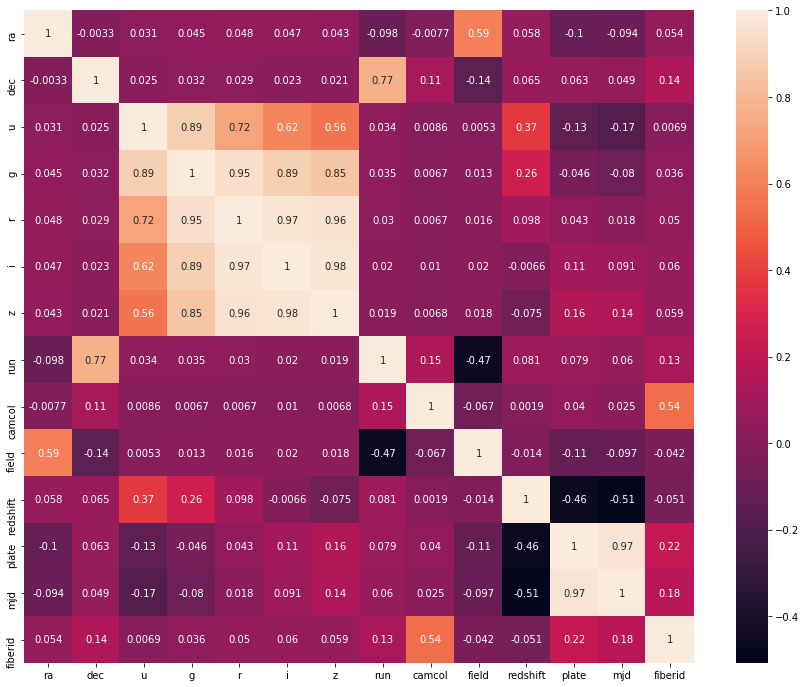

In [62]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

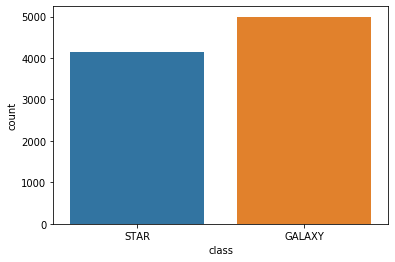

In [63]:
sns.countplot(x='class',data=df)

In [64]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])

In [65]:
df.skew()

ra         -1.237581
dec         1.248982
u          -1.170624
g          -0.785438
r          -0.216295
i           0.245029
z           0.138415
run         0.444902
camcol     -0.093316
field       0.253139
class       0.185744
redshift    2.571117
plate       1.762073
mjd         0.977532
fiberid     0.308305
dtype: float64

In [66]:
#Split the data
x=df.drop(['class'],axis=1)
y=df['class']

In [67]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
x= sc.fit_transform(x)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc


In [69]:
max_acc_score=0
for i in range(42,101):
    r_state=i
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
    lg = LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    print("The accuracy score for",i, " is" ,acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
        
print("The maximum accuracy score ",final_r_state," is ",max_acc_score)     

The accuracy score for 42  is 0.9633879781420766
The accuracy score for 43  is 0.9612021857923497
The accuracy score for 44  is 0.9606557377049181
The accuracy score for 45  is 0.9639344262295082
The accuracy score for 46  is 0.9617486338797814
The accuracy score for 47  is 0.9530054644808743
The accuracy score for 48  is 0.9639344262295082
The accuracy score for 49  is 0.9612021857923497
The accuracy score for 50  is 0.9546448087431694
The accuracy score for 51  is 0.9628415300546448
The accuracy score for 52  is 0.953551912568306
The accuracy score for 53  is 0.9584699453551913
The accuracy score for 54  is 0.9672131147540983
The accuracy score for 55  is 0.966120218579235
The accuracy score for 56  is 0.9540983606557377
The accuracy score for 57  is 0.9622950819672131
The accuracy score for 58  is 0.9612021857923497
The accuracy score for 59  is 0.9584699453551913
The accuracy score for 60  is 0.9508196721311475
The accuracy score for 61  is 0.9562841530054644
The accuracy score for

In [70]:
#Finalizing the tain_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=72,test_size=0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7320, 14)
(7320,)
(1830, 14)
(1830,)


In [71]:
#best parameters for KNN

from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
grid_param ={'n_neighbors':range(1,30)}
gd=GridSearchCV(knn,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 1}

In [72]:
#best parameters for DecisionTree

dtc=DecisionTreeClassifier()
grid_param ={'criterion': ['gini', 'entropy']}
gd=GridSearchCV(dtc,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}

In [77]:
#best parameters for SVC

svc = SVC()
grid_param ={'kernel': ('linear','poly','rbf'), 'C':[1,10]}
gd=GridSearchCV(svc,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

{'C': 10, 'kernel': 'poly'}

In [74]:
#best parameters for RandomForest

rfc=RandomForestClassifier()
grid_param={"n_estimators":[10,100,500,1000]}
gd=GridSearchCV(rfc,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

{'n_estimators': 100}



[1 0 0 ... 0 0 1]
Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is: 0.9677595628415301


The CV Score is 0.9545355191256831


[[961  28]
 [ 31 810]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       989
           1       0.97      0.96      0.96       841

    accuracy                           0.97      1830
   macro avg       0.97      0.97      0.97      1830
weighted avg       0.97      0.97      0.97      1830



roc_auc_score 0.9674138472063086


AxesSubplot(0.125,0.808774;0.62x0.0712264)


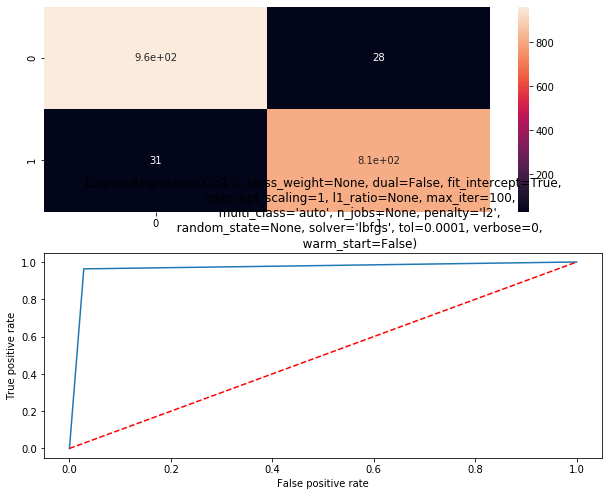



[1 0 0 ... 0 0 1]
Accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform') is: 0.9273224043715848


The CV Score is 0.8979234972677596


[[937  52]
 [ 81 760]]


              precision    recall  f1-score   support

           0       0.92      0.95      0.93       989
           1       0.94      0.90      0.92       841

    accuracy                           0.93      1830
   macro avg       0.93      0.93      0.93      1830
weighted avg       0.93      0.93      0.93      1830



roc_auc_score 0.9255538630043438


AxesSubplot(0.125,0.808774;0.62x0.0712264)


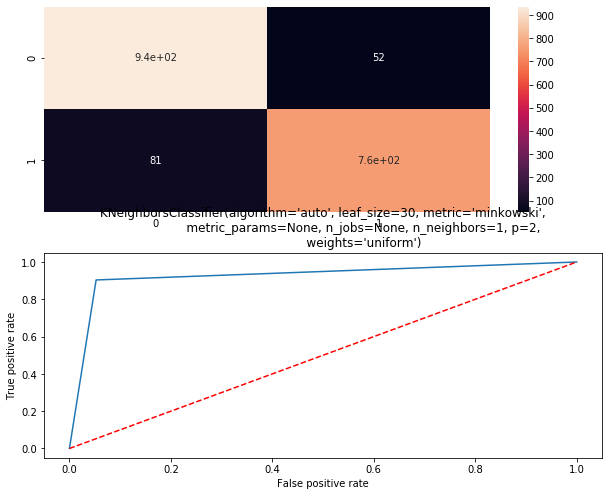



[1 0 0 ... 0 0 1]
Accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: 0.9994535519125683


The CV Score is 0.9979234972677595


[[988   1]
 [  0 841]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       989
           1       1.00      1.00      1.00       841

    accuracy                           1.00      1830
   macro avg       1.00      1.00      1.00      1830
weighted avg       1.00      1.00      1.00      1830



roc_auc_score 0.9994944388270981


AxesSubplot(0.125,0.808774;0.62x0.0712264)


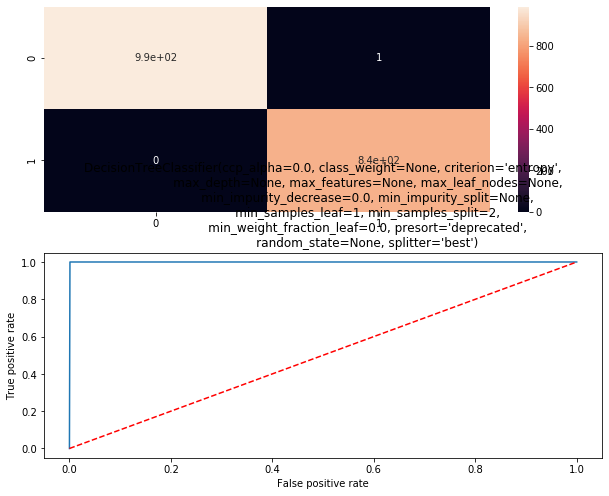



[1 0 0 ... 0 0 1]
Accuracy score of SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is: 0.9934426229508196


The CV Score is 0.9918032786885245


[[977  12]
 [  0 841]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       989
           1       0.99      1.00      0.99       841

    accuracy                           0.99      1830
   macro avg       0.99      0.99      0.99      1830
weighted avg       0.99      0.99      0.99      1830



roc_auc_score 0.993933265925177


AxesSubplot(0.125,0.808774;0.62x0.0712264)


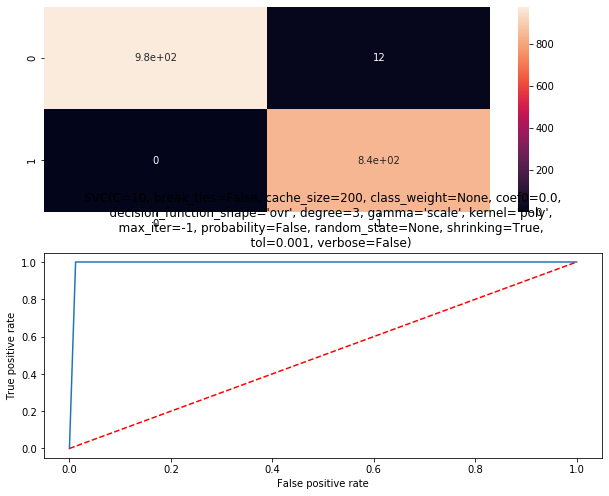



[1 0 0 ... 0 0 1]
Accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is: 0.9978142076502732


The CV Score is 0.9969398907103825


[[985   4]
 [  0 841]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       989
           1       1.00      1.00      1.00       841

    accuracy                           1.00      1830
   macro avg       1.00      1.00      1.00      1830
weighted avg       1.00      1.00      1.00      1830




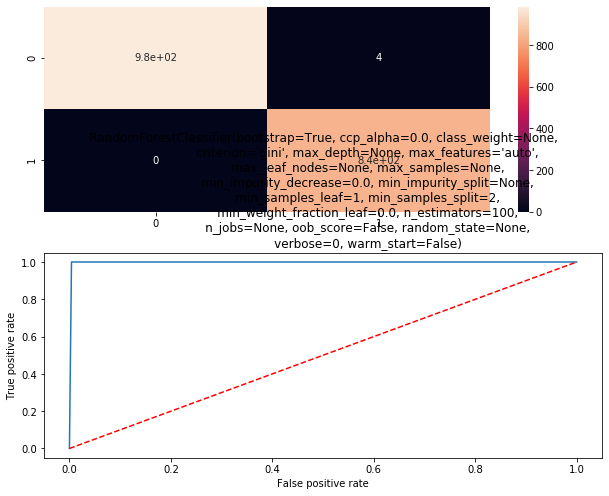



[1 0 0 ... 0 0 1]
Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is: 0.994535519125683


The CV Score is 0.9914754098360655


[[985   4]
 [  6 835]]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       989
           1       1.00      0.99      0.99       841

    accuracy                           0.99      1830
   macro avg       0.99      0.99      0.99      1830
weighted avg       0.99      0.99      0.99      1830



roc_auc_score 0.994410573382114


AxesSubplot(0.125,0.808774;0.62x0.0712264)


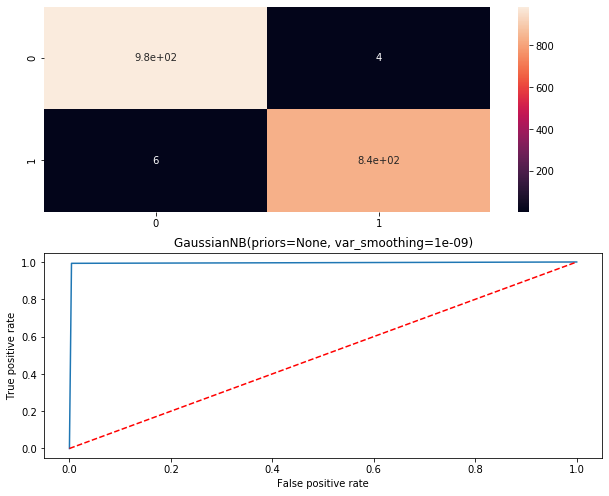

In [78]:
#Testing the models with the best parameters calculated

model=[]
score=[]
cvs=[]
rocscore=[]

for i in [LogisticRegression(),KNeighborsClassifier(n_neighbors=1),DecisionTreeClassifier(criterion='entropy'),SVC(kernel='poly',C=10),RandomForestClassifier(n_estimators=100),GaussianNB()]:
    model.append(i)
    print('\n')
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    pred=i.predict(x_test)
    print(pred)
    ac=accuracy_score(y_test,pred)
    print('Accuracy score of',i,'is:',ac)
    score.append(ac)
    print('\n')
    cv_score=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    print('The CV Score is', cv_score)
    cvs.append(cv_score)
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()

In [80]:
result=pd.DataFrame({'Model':['LogisticRegresssion','SVC','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GausianNB'],'Accuracy_Score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve
0,LogisticRegresssion,0.967760,0.954536,0.967414
1,SVC,0.927322,0.897923,0.925554
2,KNeighborsClassifier,0.999454,0.997923,0.999494
3,DecisionTreeClassifier,0.993443,0.991803,0.993933
4,RandomForestClassifier,0.997814,0.996940,0.997978
5,GausianNB,0.994536,0.991475,0.994411


Since KNeighbors is giving better results,we finalize the same.

Saving the model

In [81]:
from sklearn.externals import joblib
joblib.dump(knn,'space.knn')

['space.knn']